#

# Title : Daily Social Media Users Analys# 

#

# DATASET IMPORT

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/kaggle/input/daily-social-media-active-users/Social Media Users.csv', delimiter=',')
df = df.copy()
df.head()

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13
3,Instagram,Meta,Photo and video sharing,Timor-Leste,295.43,Yes,2019-04-21
4,Threads,Meta,Text-based social networking,Bermuda,71.78,No,2015-07-14


In [30]:
print("=== Information Data ===")
df.info()

=== Information Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Platform                10000 non-null  object 
 1   Owner                   10000 non-null  object 
 2   Primary Usage           10000 non-null  object 
 3   Country                 10000 non-null  object 
 4   Daily Time Spent (min)  10000 non-null  float64
 5   Verified Account        10000 non-null  object 
 6   Date Joined             10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


#### Column "Data Joined" is wrong data type. It must be change on Datetime type in Cleaning Data process.

In [31]:
print("=== Missing Values Check ===")
df.isnull().sum()

=== Missing Values Check ===


Platform                  0
Owner                     0
Primary Usage             0
Country                   0
Daily Time Spent (min)    0
Verified Account          0
Date Joined               0
dtype: int64

In [32]:
print("=== Data Describe ===")
df.describe()

=== Data Describe ===


,Daily Time Spent (min)
count,10000.000000
mean,152.211145
std,85.142750
min,5.020000
25%,78.920000
50%,152.735000
75%,225.642500
max,300.000000


# Cleanning Data

In [33]:
print("\n=== Change type Data ===")
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df.info()

print("\n=== Missing Values in the DataFrame ===")
missing_value = df.isnull().sum()
print(missing_value[missing_value > 0] if missing_value.sum() > 0 else "No missing values found")

print("\n=== Information about the DataFrame ===")
df.info()

print("\n=== Descriptive Statistics: ===")
desc_stats = df.describe()
print(desc_stats)

print("\n=== Duplicate Data ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

count_verified = df['Verified Account'].value_counts()
print("\n=== Count Accounts ===")
print(count_verified)


print('\n=== Sort Value')
df = df.sort_values(by='Date Joined')
df.head()


=== Change type Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Platform                10000 non-null  object        
 1   Owner                   10000 non-null  object        
 2   Primary Usage           10000 non-null  object        
 3   Country                 10000 non-null  object        
 4   Daily Time Spent (min)  10000 non-null  float64       
 5   Verified Account        10000 non-null  object        
 6   Date Joined             10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 547.0+ KB

=== Missing Values in the DataFrame ===
No missing values found

=== Information about the DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Cou

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
4882,YouTube,Google,Video sharing,France,190.13,No,2015-05-04
8853,Reddit,Reddit Inc.,Discussion forums and communities,Kyrgyz Republic,221.69,No,2015-05-04
9555,Quora,Quora Inc.,Q&A knowledge sharing,Monaco,168.14,Yes,2015-05-04
6322,Pinterest,Pinterest Inc.,Visual discovery and bookmarking,South Africa,260.57,No,2015-05-04
1044,Quora,Quora Inc.,Q&A knowledge sharing,Poland,132.92,No,2015-05-04


In [34]:
print("\n=== Change Name Columns ===")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()


=== Change Name Columns ===


,platform,owner,primary_usage,country,daily_time_spent_(min),verified_account,date_joined
4882,YouTube,Google,Video sharing,France,190.13,No,2015-05-04
8853,Reddit,Reddit Inc.,Discussion forums and communities,Kyrgyz Republic,221.69,No,2015-05-04
9555,Quora,Quora Inc.,Q&A knowledge sharing,Monaco,168.14,Yes,2015-05-04
6322,Pinterest,Pinterest Inc.,Visual discovery and bookmarking,South Africa,260.57,No,2015-05-04
1044,Quora,Quora Inc.,Q&A knowledge sharing,Poland,132.92,No,2015-05-04


# EXPLORATORY DATA

In [35]:
df.describe()

,daily_time_spent_(min),date_joined
count,10000.000000,10000
mean,152.211145,2020-04-27 01:55:12
min,5.020000,2015-05-04 00:00:00
25%,78.920000,2017-10-25 00:00:00
50%,152.735000,2020-04-22 00:00:00
75%,225.642500,2022-10-20 06:00:00
max,300.000000,2025-05-03 00:00:00
std,85.142750,NaN


### Total Platform per Column

In [36]:
count_platforms = df['platform'].value_counts(ascending=False)
print("\n=== Count by Platform ===")
print(count_platforms)


=== Count by Platform ===
platform
Reddit                  764
Instagram               745
WeChat                  742
Threads                 724
TikTok                  716
LinkedIn                710
YouTube                 709
Facebook                709
X (formerly Twitter)    706
Pinterest               704
Snapchat                701
Telegram                696
Quora                   695
WhatsApp                679
Name: count, dtype: int64


In [37]:
count_owners = df['owner'].value_counts(ascending=False)
print("\n=== Count by Owner ===")
print(count_owners)


=== Count by Owner ===
owner
Meta               2857
Reddit Inc.         764
Tencent             742
ByteDance           716
Microsoft           710
Google              709
X Corp.             706
Pinterest Inc.      704
Snap Inc.           701
Telegram FZ LLC     696
Quora Inc.          695
Name: count, dtype: int64


In [38]:
count_countries = df['country'].value_counts()
print("\n=== Count by Country ===")
print(count_countries)


=== Count by Country ===
country
Congo                               82
Korea                               78
Botswana                            56
Suriname                            55
Solomon Islands                     54
                                    ..
Liechtenstein                       28
Russian Federation                  28
Montenegro                          27
Lao People's Democratic Republic    26
Saint Kitts and Nevis               26
Name: count, Length: 243, dtype: int64


In [39]:
count_primary_usage = df['primary_usage'].value_counts()
print("\n=== Count by Primary Usage ===")
print(count_primary_usage)


=== Count by Primary Usage ===
primary_usage
Messaging                            1375
Discussion forums and communities     764
Photo and video sharing               745
Messaging and social media            742
Text-based social networking          724
Short-form videos                     716
Professional networking               710
Video sharing                         709
Social networking                     709
Microblogging                         706
Visual discovery and bookmarking      704
Multimedia messaging                  701
Q&A knowledge sharing                 695
Name: count, dtype: int64


In [40]:
daily_spent_time_category = df['daily_time_spent_(min)']

print("\n=== Daily Time Spent (min) ===")
def daily_time_spent(daily_spent_time_category):
    if daily_spent_time_category < 60:
        return 'Normal (< 60 min)'
    elif daily_spent_time_category >= 60 and daily_spent_time_category < 180:
        return 'Medium (>= 60 and < 180)'
    elif daily_spent_time_category >= 180:
        return 'Hard (>= 180)'
    else :
        'Unknown'

df['spent_time_category'] = df['daily_time_spent_(min)'].apply(daily_time_spent)
print(df['spent_time_category'].value_counts())


=== Daily Time Spent (min) ===
spent_time_category
Medium (>= 60 and < 180)    4091
Hard (>= 180)               4028
Normal (< 60 min)           1881
Name: count, dtype: int64


In [41]:
df['date_joined'] = pd.to_datetime(df['date_joined'], errors='coerce')
df['Join Year'] = df['date_joined'].dt.year
count_years = df['Join Year'].value_counts()


print("\n=== Count by Year Joined ===")
print(count_years)


=== Count by Year Joined ===
Join Year
2018    1055
2016    1050
2024    1029
2020    1010
2022     998
2019     989
2021     976
2017     963
2023     956
2015     644
2025     330
Name: count, dtype: int64


In [42]:
def categorize_player(year):
    if year <= 2015:
        return 'Old Player (<= 2015)'
    elif 2015 < year <= 2020:
        return 'Intermediate Player (2016-2020)'
    elif year > 2020:
        return 'New Player (> 2020)'
    else:
        return 'Unknown'

df['Player Category'] = df['Join Year'].apply(categorize_player)
print("\n=== Player Categories ===")
print(df['Player Category'].value_counts())


=== Player Categories ===
Player Category
Intermediate Player (2016-2020)    5067
New Player (> 2020)                4289
Old Player (<= 2015)                644
Name: count, dtype: int64


# VISUALIZATION DATA

### Distribution Data

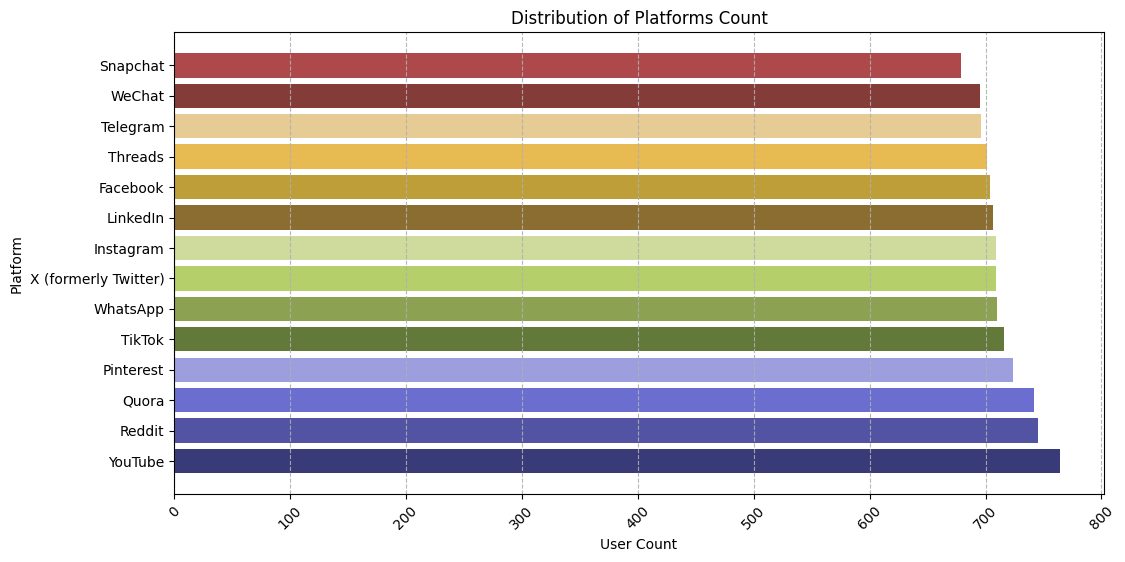

In [43]:
colors = plt.cm.tab20b.colors

plt.figure(figsize=(12,6))
plt.title('Distribution of Platforms Count')
plt.xlabel('User Count')
plt.ylabel('Platform')
plt.barh(df['platform'].unique(), count_platforms, color=colors[:len(count_platforms)])
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.show()


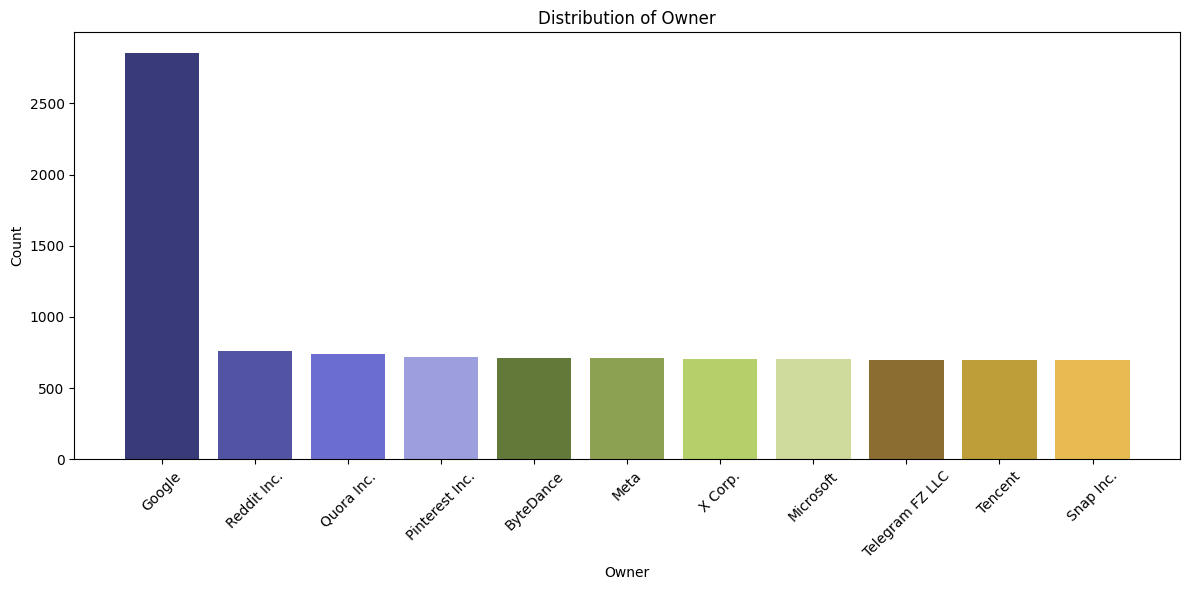

In [44]:
colors = plt.cm.tab20b.colors

plt.figure(figsize=(12, 6))
plt.bar(x=df['owner'].unique(), height=count_owners, color=colors[:len(count_owners)])
plt.title("Distribution of Owner")
plt.xlabel("Owner")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

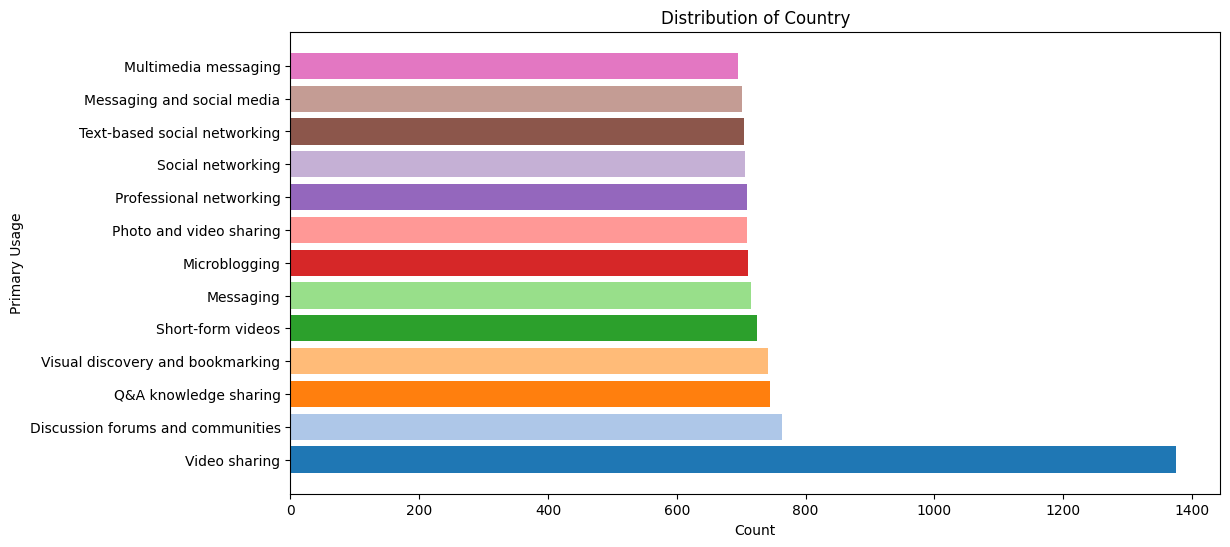

In [45]:
colors = plt.cm.tab20.colors
plt.figure(figsize=(12, 6))
plt.barh(df['primary_usage'].unique(), count_primary_usage, color=colors[:len(count_primary_usage)])
plt.title("Distribution of Country")
plt.xlabel("Count")
plt.ylabel("Primary Usage")
plt.show()

Mean :  3333.3333333333335
Median :  4028.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


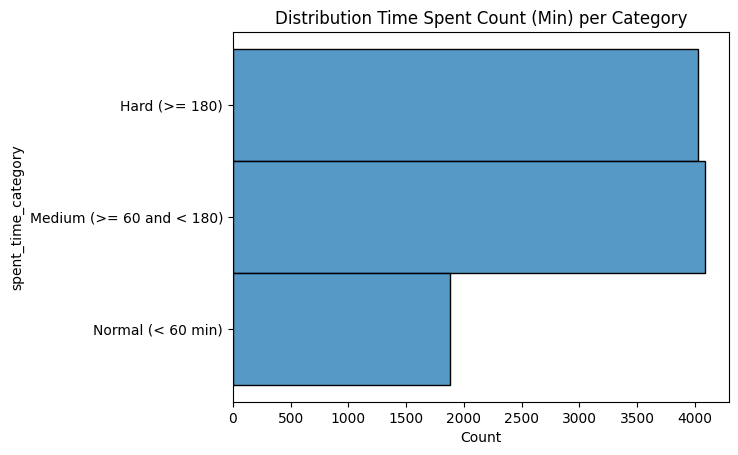

In [46]:
print("Mean : ", np.mean(df['spent_time_category'].value_counts()))
print("Median : ", np.median(df['spent_time_category'].value_counts()))

sns.histplot(y=df['spent_time_category'])
plt.title("Distribution Time Spent Count (Min) per Category")
plt.show()

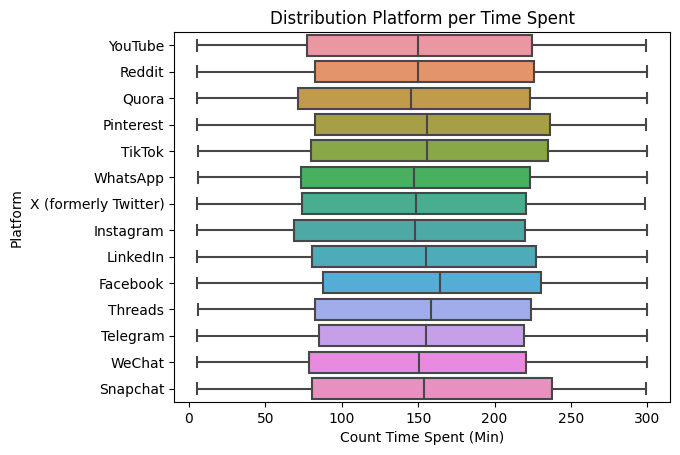

In [47]:
sns.boxplot(data=df, x=df['daily_time_spent_(min)'], y=df['platform'])
plt.title("Distribution Platform per Time Spent")
plt.xlabel('Count Time Spent (Min)')
plt.ylabel('Platform')
plt.show()

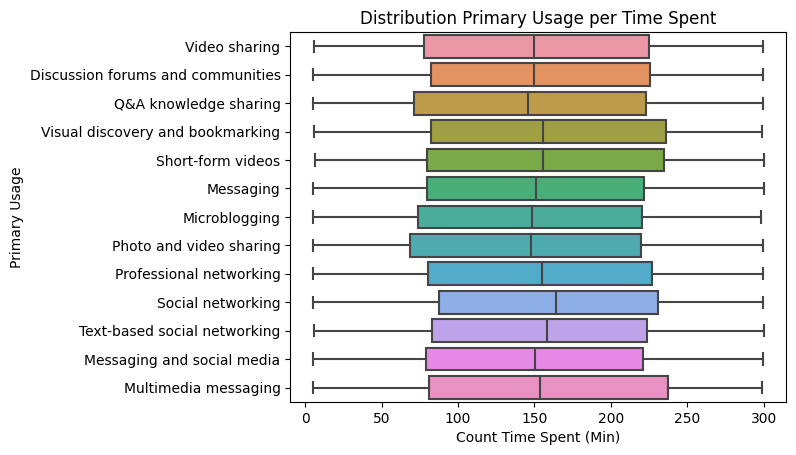

In [48]:
sns.boxplot(data=df, x=df['daily_time_spent_(min)'], y=df['primary_usage'])
plt.title('Distribution Primary Usage per Time Spent')
plt.xlabel('Count Time Spent (Min)')
plt.ylabel('Primary Usage')
plt.show()

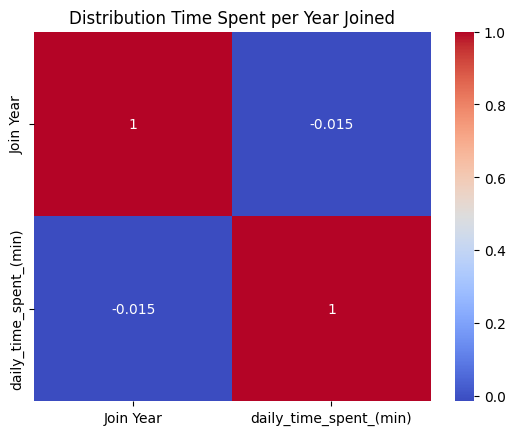

In [49]:
numeric_df = df[['Join Year','daily_time_spent_(min)']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Distribution Time Spent per Year Joined')
plt.show()

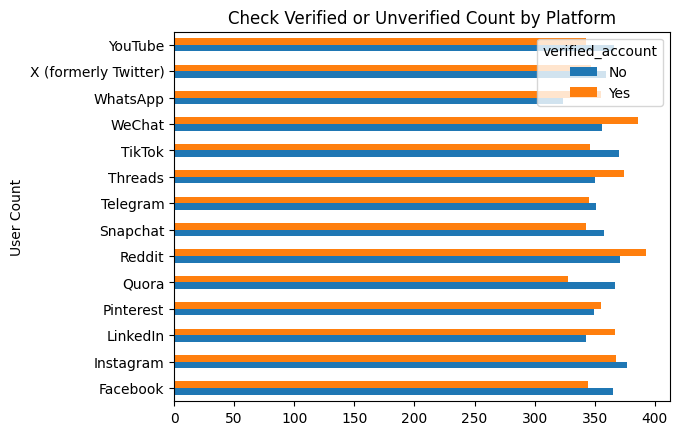

In [50]:
verified_check = pd.crosstab(df['platform'], df['verified_account'])
verified_check.plot(kind='barh', stacked=False)
plt.title('Check Verified or Unverified Count by Platform')
plt.ylabel('User Count')
plt.show()

# RESULT ANALYST

1. Social Media Platform Usage. Instagram and TikTok are the most commonly used platforms among respondents. This indicates that both platforms have a strong digital presence, particularly among active online users.
2. Daily Time Spent Categories. Most users spend between 60 to 180 minutes per day on social media, categorized as Medium usage. This suggests that social media has become a part of daily routines, but not yet at an excessive level.
3. Primary Usage Purpose. The most common purposes for using social media are entertainment and information seeking. Meanwhile, usage for business or professional goals remains relatively low, indicating potential growth opportunities for digital industries.
4. Verified vs. Non-Verified Accounts. The majority of users do not have verified accounts. However, users with verified accounts tend to spend more time per day on social media, which may reflect their role as content creators or digital business actors.
5. Date Joined Trend. Based on the Date Joined column, most users became active on social media starting in [insert year], indicating a significant adoption growth during that period.